In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splrep, splev, interp2d,LSQBivariateSpline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import light_echo as le

In [2]:
import os
import json
import glob
import pandas as pd

In [3]:
import skimage
#from skimage import data, io, filters

In [4]:
from spectra_utils import * 

In [6]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['axes.labelsize'] = 16

plt.rcParams['legend.fontsize'] = 16

In [154]:
snjsonfiles = get_snjsonfiles()

In [155]:
#sndata = get_sndata(snid='1994D', snjsonfiles=snjsonfiles)

In [174]:
LEIa_npz = glob.glob("LEtemp/Ia/LEtemplate_*")
LEIa_npz.sort()
snid_Ia = [i.replace('.npz', '').split('_')[-1] for i in LEIa_npz ]
np.array(snid_Ia)

array(['SN1991T', 'SN1991bg', 'SN1994D', 'SN1996X', 'SN1997br',
       'SN1998aq', 'SN1998bu', 'SN1999aa', 'SN1999by', 'SN2000cx',
       'SN2001V', 'SN2001el', 'SN2002bo', 'SN2002dj', 'SN2002er',
       'SN2003cg', 'SN2003du', 'SN2003hv', 'SN2004eo', 'SN2005M',
       'SN2005bl', 'SN2005cf', 'SN2005hk', 'SN2005ke', 'SN2006D',
       'SN2006X', 'SN2007af', 'SN2007le', 'SN2007on', 'SN2008bf',
       'SN2008fp', 'SN2009Y', 'SN2009dc', 'SN2009ig', 'SN2011by',
       'SN2011fe', 'SN2012cg', 'SN2012fr', 'SN2014J', 'SN2016coj'],
      dtype='<U9')

In [175]:
LEIb_npz = glob.glob("LEtemp/Ib/LEtemplate_*")
LEIb_npz.sort()
snid_Ib = [i.replace('.npz', '').split('_')[-1] for i in LEIb_npz ]
np.array(snid_Ib)

array(['SN2005bf', 'SN2008D', 'SN2008ax', 'SN2009jf', 'SN2014C'],
      dtype='<U8')

In [176]:
LEIc_npz = glob.glob("LEtemp/Ic/LEtemplate_*")
LEIc_npz.sort()
snid_Ic = [i.replace('.npz', '').split('_')[-1] for i in LEIc_npz ]
np.array(snid_Ic)

array(['SN1994I', 'SN1998bw', 'SN2002ap', 'SN2003bg', 'SN2006aj',
       'SN2007gr', 'SN2011bm', 'SN2012ap', 'SN2013ge'], dtype='<U8')

In [177]:
LEIIb_npz = glob.glob("LEtemp/IIb/LEtemplate_*")
LEIIb_npz.sort()
snid_IIb = [i.replace('.npz', '').split('_')[-1] for i in LEIIb_npz ]
np.array(snid_IIb)

array(['SN1993J', 'SN1996cb', 'SN2011dh', 'SN2011ei', 'SN2011fu',
       'SN2011hs', 'SN2013df'], dtype='<U8')

In [178]:
LEIIP_npz = glob.glob("LEtemp/IIP/LEtemplate_*")
LEIIP_npz.sort()
snid_IIP = [i.replace('.npz', '').split('_')[-1] for i in LEIIP_npz ]
np.array(snid_IIP)

array(['SN1999br', 'SN1999em', 'SN1999gi', 'SN2002gd', 'SN2003hl',
       'SN2004dj', 'SN2004et', 'SN2005cs', 'SN2006bp', 'SN2007aa',
       'SN2008bk', 'SN2008in', 'SN2009N', 'SN2012aw', 'SN2013ab',
       'SN2013am', 'SN2013ej', 'SN2014cy'], dtype='<U8')

In [179]:
df = pd.DataFrame(columns=['ID', 'type', 'photmetry', 'spectra'])

typ = 'Ia'
for snid in snid_Ia:
    
    
    spec = np.load(f'LEtemp/{typ}/LEtemplate_{snid}.npz', allow_pickle=True)

    sndata = get_sndata(snid=snid[2:], snjsonfiles=snjsonfiles)
    
    sntype = [s['value'] for s in sndata['claimedtype'] ]
    
    X = spec['X']
    Y = spec['Y']
    Z = spec['Z']
    
    N_phot = len(sndata['photometry'])

    N_spectra = X.shape[0]
    
    df.loc[len(df)] = {'ID':snid, 'type':sntype, 'photmetry':N_phot, 'spectra':N_spectra}
    

In [180]:
df.head(2)

,ID,type,photmetry,spectra
0,SN1991T,"[Ia-91T, Ia, Ia Pec]",731,13
1,SN1991bg,"[Ia Pec, Ia-91bg, Ia, LGRB]",173,17


In [183]:
typ = 'Ia'
df.to_csv(f"LEtemp/df_{typ}.csv", index=False)

In [182]:
df

,ID,type,photmetry,spectra
0,SN1991T,"[Ia-91T, Ia, Ia Pec]",731,13
1,SN1991bg,"[Ia Pec, Ia-91bg, Ia, LGRB]",173,17
2,SN1994D,[Ia],593,53
3,SN1996X,[Ia],243,22
4,SN1997br,"[Ia Pec, Ia]",225,22
5,SN1998aq,[Ia],258,53
6,SN1998bu,[Ia],1065,30
7,SN1999aa,"[Ia Pec, Ia-91T, Ia]",290,43
8,SN1999by,"[Ia Pec, Ia-91bg, Ia]",575,22
9,SN2000cx,"[Ia Pec, Ia]",1252,33


In [149]:
subtype = df['type'] # [0].strip('[]').replace("'", '').split(',')[0]

'II P'

In [164]:
df['ID'].values

array(['SN1991T', 'SN1991bg', 'SN1994D', 'SN1996X', 'SN1997br',
       'SN1998aq', 'SN1998bu', 'SN1999aa', 'SN1999by', 'SN2000cx',
       'SN2001V', 'SN2001el', 'SN2002bo', 'SN2002dj', 'SN2002er',
       'SN2003cg', 'SN2003du', 'SN2003hv', 'SN2004eo', 'SN2005M',
       'SN2005bl', 'SN2005cf', 'SN2005hk', 'SN2005ke', 'SN2006D',
       'SN2006X', 'SN2007af', 'SN2007le', 'SN2007on', 'SN2008bf',
       'SN2008fp', 'SN2009Y', 'SN2009dc', 'SN2009ig', 'SN2011by',
       'SN2011fe', 'SN2012cg', 'SN2012fr', 'SN2014J', 'SN2016coj'],
      dtype=object)

In [170]:
df['type'][0]

['Ia-91T', 'Ia', 'Ia Pec']

In [172]:
subtype = [ df['type'][i][0] for i in range(len(df))]
subtype

['Ia-91T',
 'Ia Pec',
 'Ia',
 'Ia',
 'Ia Pec',
 'Ia',
 'Ia',
 'Ia Pec',
 'Ia Pec',
 'Ia Pec',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia Pec',
 'Ia',
 'Ia',
 'Ia Pec',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia',
 'Ia']

In [187]:
subtype = df['type'][i]

In [186]:
subtype

'['

In [190]:
df['type'][i].strip('[]').replace("'", '').split(',')[0]

'II'

Ia SN1991T
Ia SN1991bg
Ia SN1994D
Ia SN1996X
Ia SN1997br
Ia SN1998aq
Ia SN1998bu
Ia SN1999aa
Ia SN1999by
Ia SN2000cx
Ia SN2001V
Ia SN2001el
Ia SN2002bo
Ia SN2002dj
Ia SN2002er
Ia SN2003cg
Ia SN2003du
Ia SN2003hv
Ia SN2004eo
Ia SN2005M
Ia SN2005bl
Ia SN2005cf
Ia SN2005hk
Ia SN2005ke
Ia SN2006D
Ia SN2006X
Ia SN2007af
Ia SN2007le
Ia SN2007on
Ia SN2008bf
Ia SN2008fp
Ia SN2009Y
Ia SN2009dc
Ia SN2009ig
Ia SN2011by
Ia SN2011fe
Ia SN2012cg
Ia SN2012fr
Ia SN2014J
Ia SN2016coj
Ib SN2005bf
Ib SN2008D
Ib SN2008ax
Ib SN2009jf
Ib SN2014C
Ic SN1994I
Ic SN1998bw
Ic SN2002ap
Ic SN2003bg
Ic SN2006aj
Ic SN2007gr
Ic SN2011bm
Ic SN2012ap
Ic SN2013ge
IIb SN1993J
IIb SN1996cb
IIb SN2011dh
IIb SN2011ei
IIb SN2011fu
IIb SN2011hs
IIb SN2013df
IIP SN1999br
IIP SN1999em
IIP SN1999gi
IIP SN2002gd
IIP SN2003hl
IIP SN2004dj
IIP SN2004et
IIP SN2005cs
IIP SN2006bp
IIP SN2007aa
IIP SN2008bk
IIP SN2008in
IIP SN2009N
IIP SN2012aw
IIP SN2013ab
IIP SN2013am
IIP SN2013ej
IIP SN2014cy


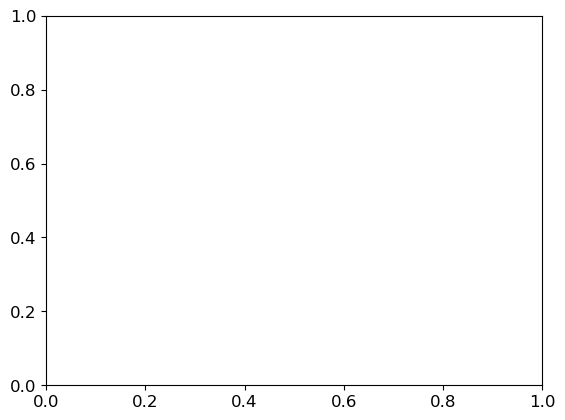

In [229]:
fig, ax = plt.subplots(1, 1)

# prepare for snid
with open(f"LEtemp/txt/snidlist.txt", 'w') as f:
    # clear snidlist
    f.write('')


for typ in ['Ia', 'Ib', 'Ic', 'IIb', 'IIP']:
    df = pd.read_csv(f"LEtemp/df_{typ}.csv")
    
    for i, snid in enumerate(df['ID'].values):
        spec = np.load(f'LEtemp/{typ}/LEtemplate_{snid}.npz', allow_pickle=True)

        # specnew = spec['specnew'].item()

        #X = spec['X']
        #Y = spec['Y']
        #Z = spec['Z']

        X2 = spec['X2']
        Y2 = spec['Y2']
        Z2 = spec['Z2']

        LE_wave = X2[0][40:]
        LE_flux = le.mklecho_tophat(X2, Y2, Z2, p_int = [-20, 100])[40:]
        LE_flux = LE_flux/LE_flux.max()
        

        df_LEtemp = pd.DataFrame()
        df_LEtemp['wavelength'] = LE_wave
        df_LEtemp['flux'] = LE_flux
        
        with open(f"LEtemp/txt/LEtemp_{snid}.txt", 'w') as f:

            f.write('# z obs_date\n')

            f.write('# 0 52280\n')

        df_LEtemp.to_csv(f"LEtemp/txt/LEtemp_{snid}.txt", index=False, 
                         header=False, mode='a', sep=' ')
        
        subtype = df['type'][i].strip('[]').replace("'", '').split(',')[0]
        

        with open(f"LEtemp/txt/snidlist.txt", 'a') as f:
            s = f'{snid[4:]}-LE {typ} "{subtype}" LEtemp_{snid}.txt 0 0 -9.990000 0 3500.0 9998.0 0.00\n'
            f.write(s)
            
        ax.plot(df_LEtemp['wavelength'], df_LEtemp['flux'],)
        ax.set_title(f"{snid} {typ}")
        fig.savefig(f"LEtemp/txt/LEtemp_{snid}.png", dpi=200)
        
        ax.clear()
        print(typ, snid)

In [230]:
snid[4:]

'14cy'

In [314]:
df_LE = pd.read_csv("LEtemp/txt/LEtemp_SN1991T.txt", skiprows=2, delim_whitespace=True,
            names=['wavelength', 'flux'])


In [ ]:
%matplotlib 

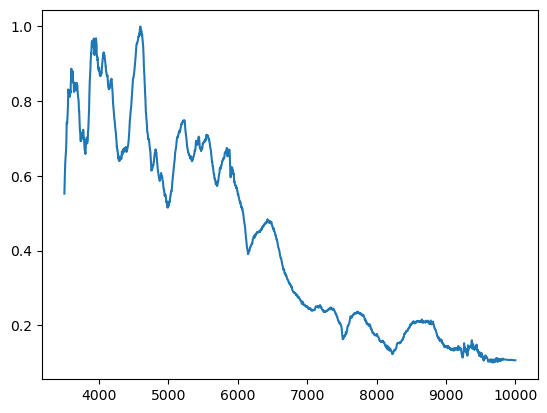

In [315]:

plt.plot(df_LE.wavelength, df_LE.flux)
plt.title()
plt.savefig("")

In [301]:
typ = 'Ib'
snid = '2008D'
spec = np.load(f'LEtemp/{typ}/LEtemplate_SN{snid}.npz', allow_pickle=True)

sntype = spec['sntype']
# specnew = spec['specnew'].item()

#X = spec['X']
#Y = spec['Y']
#Z = spec['Z']

X2 = spec['X2']
Y2 = spec['Y2']
Z2 = spec['Z2']


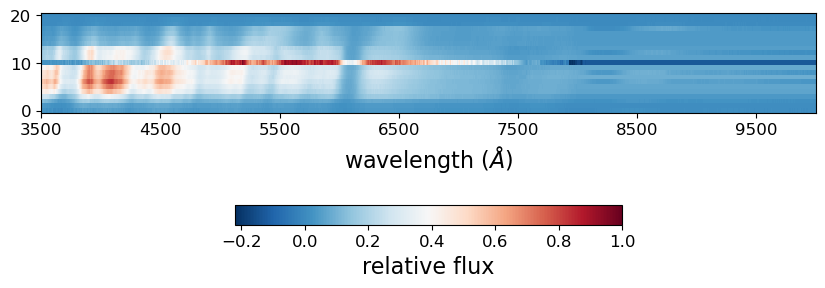

In [302]:

plt.figure(figsize=[10,8])
plt.imshow(Z / Z.max(), aspect=20, origin='lower', 
           interpolation='none', cmap=matplotlib.cm.RdBu_r)
xticks = [0, 500, 1000, 1500, 2000, 2500, 3000]
plt.xticks(xticks, labels=np.int32(X2[0][xticks]));
plt.xlabel(r'wavelength ($\AA$)')
#yticks = [0, 20, 30, 40, 60, 80, 100]
#plt.yticks(yticks, )#labels=Y2[:, 0][yticks])
#plt.ylabel(r'phase (days)')

cbar = plt.colorbar(orientation='horizontal', shrink=0.5)
cbar.set_label('relative flux')
#plt.savefig(f"spectra_heatmap_{snid}.png", dpi=300)

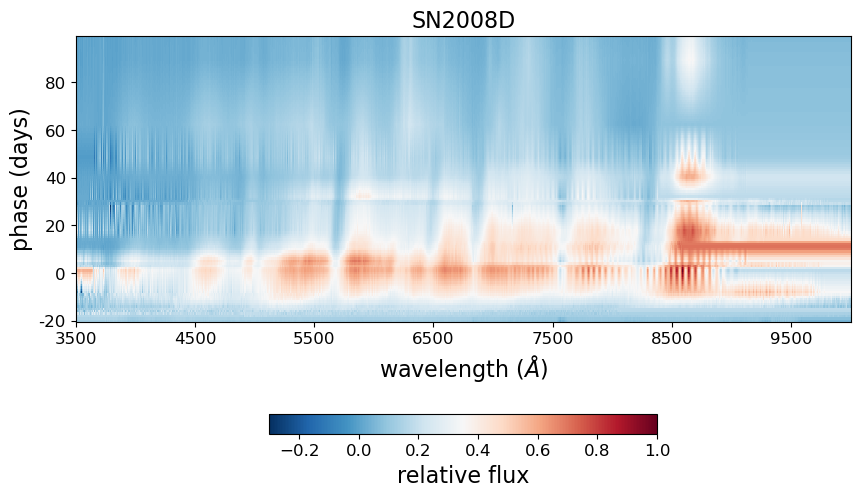

In [303]:

plt.figure(figsize=[10,8])
plt.imshow(Z2/Z2.max(), aspect=10, origin='lower', 
           interpolation='none', cmap=matplotlib.cm.RdBu_r)
xticks = [0, 500, 1000, 1500, 2000, 2500, 3000]
plt.xticks(xticks, labels=np.int32(X2[0][xticks]));
plt.xlabel(r'wavelength ($\AA$)')
yticks = [0, 20, 40, 60, 80, 100]
plt.yticks(yticks, labels=Y2[:, 0][yticks])
plt.ylabel(r'phase (days)')

cbar = plt.colorbar(orientation='horizontal', shrink=0.5)
cbar.set_label('relative flux')
plt.title(f'SN{snid}', fontsize=16)
plt.savefig(f"../../../../Desktop/thesis/figures/spectra_heatmap_{snid}.png", dpi=300, )

In [304]:
lechos = []
lecho_d1 = le.mklecho_tophat(X2, Y2, Z2, p_int = [-20,10])
lecho_d3 = le.mklecho_tophat(X2, Y2, Z2, p_int = [-20, 100])
lechos.append([X2[0][100:], lecho_d1[100:]])
lechos.append([X2[0][100:], lecho_d3[100:]])

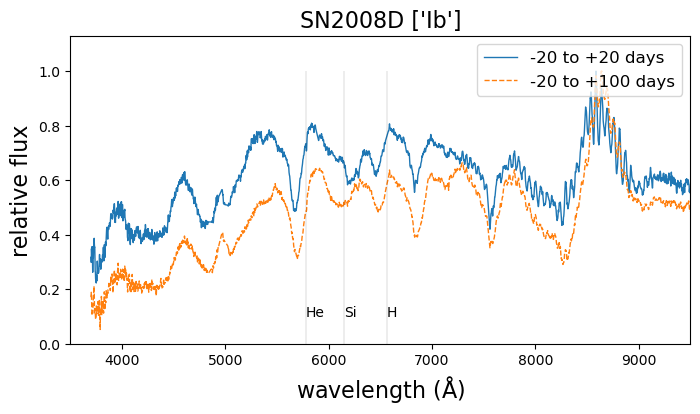

In [310]:
#fig, ax, = le.basic_format(size=[8,4])

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
labels = ['-20 to +20 days', '-20 to +100 days']
ls = ['-','--', '-']

for i, lecho in enumerate(lechos):
    scale = 1./np.amax(lecho[1])
#     scale = 1.
    plt.plot(lecho[0], scale*lecho[1], label = labels[i], linestyle=ls[i], lw=1)
    
plt.xlabel('wavelength ($\mathrm{\AA}$)', fontsize=16)
plt.ylabel('relative flux', fontsize = 16)
plt.legend(fontsize=12, frameon=True, loc='upper right')
plt.xlim(3500,9500)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title(f'SN{snid} {sntype}', fontsize=16)



# plot spectral lines



plt.text(x=6563, y=0.1, s='H')
plt.vlines(x=6563, ymin=0, ymax=1, colors='k', linewidth=.1)

#plt.text(x=5876, y=0.1, s='He')
#plt.vlines(x=5876, ymin=0, ymax=1, colors='k', linewidth=.1)

plt.text(x=6150, y=0.1, s='Si')
plt.vlines(x=6150, ymin=0, ymax=1, colors='k', linewidth=.1)


#plt.text(x=5454, y=0.1, s='S')
#plt.vlines(x=5454, ymin=0, ymax=1, colors='k', linewidth=.1)

#plt.text(x=5620, y=0.1, s='S')
#plt.vlines(x=5620, ymin=0, ymax=1, colors='k', linewidth=.1)


#for x in [5577, 6300, 7775]:
#    plt.vlines(x=x, ymin=0, ymax=1, colors='k', linewidth=.2)
#    plt.text(x=x, y=0.1, s=fr'O I')


plt.ylim([0, 1.13])

plt.savefig(f'../../../../Desktop/thesis/figures/{snid}_lecho.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('plots/1994d_lecho.png', dpi = 300, bbox_inches = 'tight')

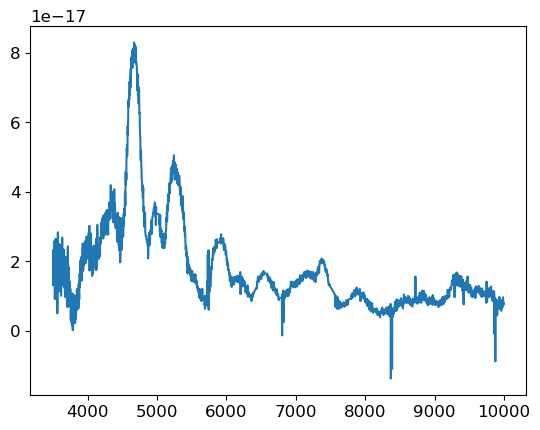

In [300]:
for i in Z[20:32]:
    plt.plot(X[0], i,)

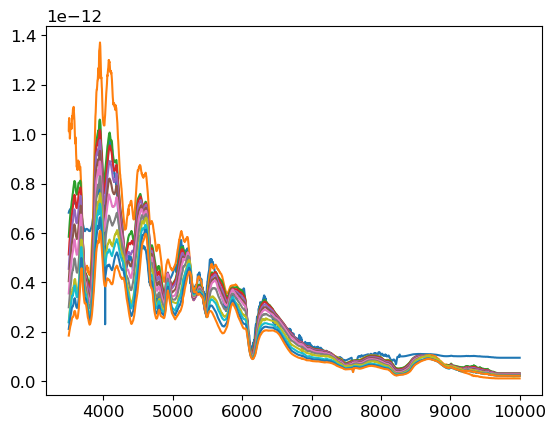

In [244]:
for i in Z2[20:32]:
    plt.plot(X2[0], i,)

In [97]:
norm = matplotlib.colors.Normalize(vmin=-20,vmax=np.max(100))
c_m = matplotlib.cm.gist_rainbow
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

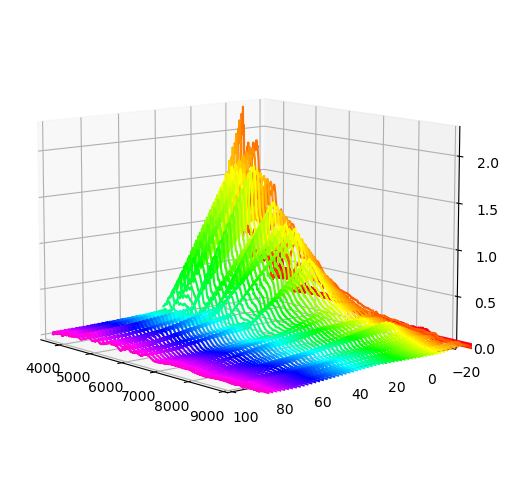

In [98]:
plt.close('all')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(left=3500, right=9000) 
ax.axes.set_ylim3d(bottom=100, top=-20)
ax.view_init(10, 320)

#for i,p in enumerate(Y):
#    if i%2 == 0:
#        p_plot=np.ones(len(X[0]))*p
#        ax.plot3D(X[0], p, Z[i],color = 'k',alpha=.5)
    
for i,p in enumerate(Y2):
    if i%2 == 0:
        p_plot=np.ones(len(X2[0]))*p
        ax.plot3D(X2[0], p, Z2[i], color = s_m.to_rgba(p[0]) )
        
#plt.show()

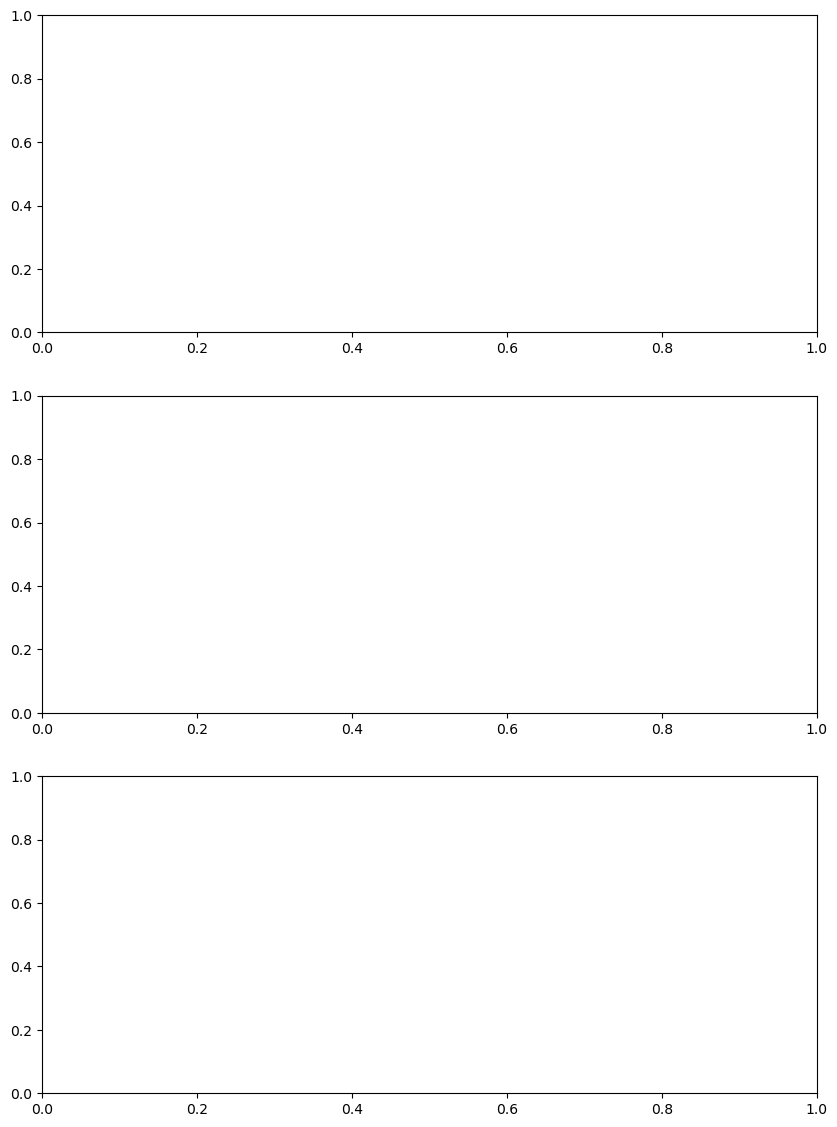

In [22]:


fig, axs = plt.subplots(3, 1, figsize=(10, 14));



In [36]:
# combine heatmap, light curve into one image

for snid in snid_IIP:
    try:
        snid = snid[2:]
        snid_lecho = skimage.io.imread(f"LEtemp/IIP/{snid}_lecho.png")
        snid_phot = skimage.io.imread(f"LEtemp/IIP/{snid}_phot.png")
        snid_spec = skimage.io.imread(f"LEtemp/IIP/{snid}_spectra_heatmap.png")

        for ax in axs:
            ax.clear()

        axs[0].imshow(snid_lecho)
        axs[1].imshow(snid_phot)
        axs[2].imshow(snid_spec)

        for ax in axs:
            ax.axis('off')

        fig.savefig(f"LEtemp/IIP/{snid}_plot.png", dpi=300)

    except:
        print(snid)


1948B
1986L
2003bn
2004fc
2007oc
2008M
2008W
2008ag


In [84]:
LEspec_2005hg = np.load("LEtemplate_SN2005hg.npz", allow_pickle=True)

LEspec_2009jf = np.load("LEtemplate_SN2009jf.npz", allow_pickle=True)


In [85]:
LEspec_2005hg.files

['specnew', 'waves', 'phases', 'X', 'Y', 'Z', 'X2', 'Y2', 'Z2']

- specnew:dict, spectra after scaled to photometry
- waves: 
- phases: 
- X: wavelength, meshgrid
- Y: original phases, meshgrid, 
- Z: original flux, 

- X2: wavelength, meshgrid
- Y2: interpolated phases, meshgrid, 
- Z2: interpolated flux, 

In [99]:
LEspec_2005hg['specnew'].item()

dict

In [19]:
LEspec_2005hg['X2'], LEspec_2009jf['X2']

(array([[3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        ...,
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.]]),
 array([[3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        ...,
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.],
        [3500., 3502., 3504., ..., 9994., 9996., 9998.]]))

In [20]:
LEspec_2005hg.files



['specnew', 'waves', 'phases', 'X', 'Y', 'Z', 'X2', 'Y2', 'Z2']

In [24]:
LEspec_2005hg['phases']


array([-11.93392752, -10.95449559,  -8.99563173,  -8.0161998 ,
        -7.03676787,  -6.05733594,  -5.07790402,  -4.09847209,
        -3.11904016,  -2.13960823,  -1.1601763 ,  -0.18074437,
         0.79868756,  13.53130264,  17.44903036,  26.45980411,
        27.24334966,  88.94756121])

In [46]:
specnew_2005hg = LEspec_2005hg['specnew'].item()
specnew_2009jf = LEspec_2009jf['specnew'].item()


In [53]:
phases_2005hg = LEspec_2005hg['phases']
phases_2009jf = LEspec_2009jf['phases']


In [63]:
phases = np.concatenate([phase_2005hg, phase_2009jf])
phases.sort()


In [48]:
specnew = {**specnew_2005hg, **specnew_2009jf}

In [66]:
waves = LEspec_2009jf['waves']

In [68]:
spec = specnew
waves = waves
phases = phases
pint_range=[-20, 100]

In [69]:
nwave = np.shape(spec[list(spec.keys())[0]]['wavelength_interp'])[0]
nphase = len(list(spec.keys()))
arr2d = []
for i,phase in enumerate(np.sort(list(spec.keys()))):
    arr2d.append(spec[phase]['flux_interp'])

weight2d = []
for i,phase in enumerate(np.sort(list(spec.keys()))):
    weight2d.append(spec[phase]['weight_interp'])


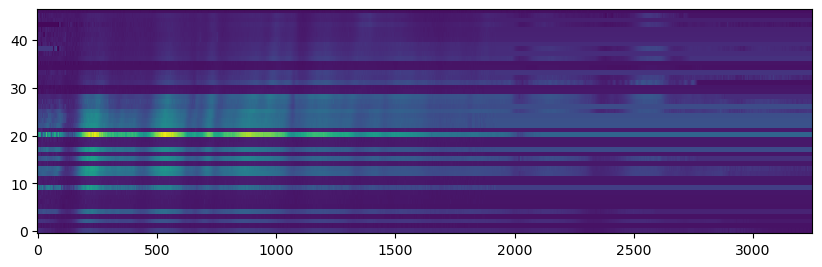

In [70]:
x = waves
y = phases
X, Y = np.meshgrid(x, y)
Z = np.asarray(arr2d)
W = np.asarray(weight2d)

plt.figure(figsize=[10,10])
plt.imshow(Z, aspect=20, origin='lower', interpolation='none')

In [73]:

# pint_range=[-10, 90]
# Z = np.sin(np.pi*X/2) * np.exp(Y/2)
# print (np.shape(x))
# print(np.shape(y))
# print (np.shape(Z))
# print (np.shape(W))

x2 = waves
y2 = np.arange(pint_range[0], pint_range[1], 1)
# y2 = np.arange(0, 90, 1)

# f = interp2d(x, y, Z, kind='linear')
# Z2 = f(x2, y2)

tx = x
ty = y
splrep = LSQBivariateSpline(X.ravel(), Y.ravel(), Z.ravel(), tx, ty, w=W.ravel(), kx=1, ky=1)
Z2 = np.transpose(splrep(x2,y2))

X2, Y2 = np.meshgrid(x2, y2)



/Users/home/miniconda3/envs/datasci/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:1272: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=6598). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


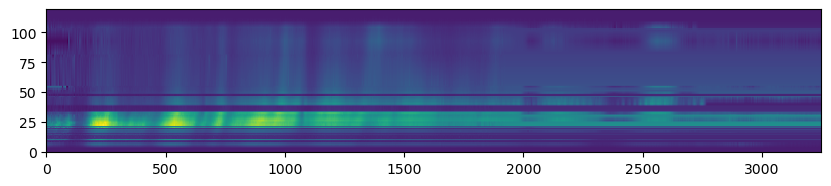

In [74]:
#inpsect interpolated spectra
plt.figure(figsize=[10,10])
plt.imshow(Z2, aspect=5, origin='lower', interpolation='none')

#for i,z in enumerate(Z2):
#    #print (Y2[i][0])
#    plt.plot(X2[i], z)
#    plt.show()
#

In [78]:
lechos = []
lecho_d1 = le.mklecho_tophat(X2, Y2, Z2, p_int = [-20,20])
lecho_d2 = le.mklecho_tophat(X2, Y2, Z2, p_int = [20,60])
lecho_d3 = le.mklecho_tophat(X2, Y2, Z2, p_int = [60,100])
lechos.append([X2[0], lecho_d1])
lechos.append([X2[0], lecho_d2])
lechos.append([X2[0], lecho_d3])

In [80]:
spec_lines = { "H alpha":6563,
            "H beta": 4861,
            "O I": 7774, 
             }


Text(6563, 0.1, 'H $\\alpha$')

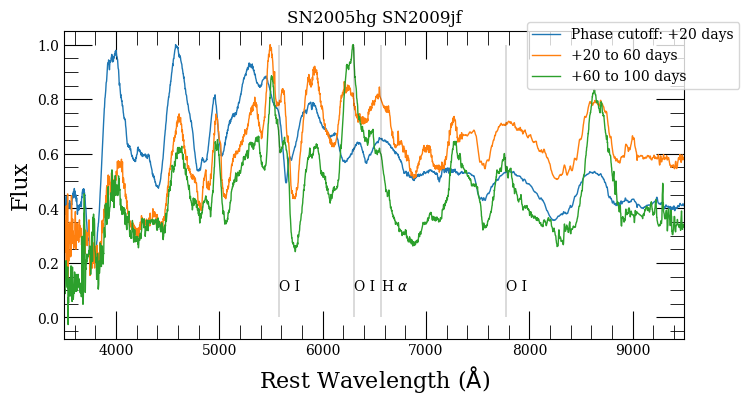

In [83]:
fig, ax, = le.basic_format(size=[8,4])
labels = ['Phase cutoff: +20 days', '+20 to 60 days', '+60 to 100 days']
ls = ['-','-', '-']

for i, lecho in enumerate(lechos):
    scale = 1./np.amax(lecho[1])
#     scale = 1.
    plt.plot(lecho[0], scale*lecho[1], label = labels[i], linestyle=ls[i], lw=1)
    
plt.xlabel('Rest Wavelength ($\mathrm{\AA}$)', fontsize=16)
plt.ylabel('Flux', fontsize = 16)
plt.legend(fontsize=10, frameon=True, bbox_to_anchor=(1.1, 1.05))
plt.xlim(3500,9500)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title(f'SN2005hg SN2009jf')


# plot spectral lines
plt.vlines(x=6563, ymin=0, ymax=1, colors='k', linewidth=.2)

for x in [5577, 6300, 7775]:
    plt.vlines(x=x, ymin=0, ymax=1, colors='k', linewidth=.2)
    plt.text(x=x, y=0.1, s=fr'O I')

plt.text(x=6563, y=0.1, s=r'H $\alpha$')


# plt.savefig('plots/1994d_lecho.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('plots/1994d_lecho.png', dpi = 300, bbox_inches = 'tight')